# BEATS raytracing
Running version of raytrcing calculations

______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   31/01/2020

Last update:  11/11/2020
______________________________________________________


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
from pandas_ods_reader import read_ods
import h5py
from scipy.constants import c, h

In [15]:
%matplotlib inline
font = {'weight' : 'normal',
        'size'   : 9}
matplotlib.rc('font', **font)

In [17]:
matplotlib.rcParams['figure.dpi'] = 300

## White beam snapshots

Position and aperture of the Fixed Mask

In [4]:
mask_divergence = np.array([1.8, 0.4])*1e-3 # [mrad] (Hor. x Ver.)
mask_d = 7.428 # [m]
mask_aperture = mask_divergence * mask_d * 1e3
print(f"Fix Mask size: {mask_aperture[0]:.2f} x {mask_aperture[1]:.2f} [mm^2] (Hor. x Ver.)")
print(f"BL divergence: {1e3*mask_divergence[0]:.2f} x {1e3*mask_divergence[1]:.2f} [mrad] (Hor. x Ver.)")

mask = np.array([[-mask_aperture[0]/2, mask_aperture[0]/2], [-mask_aperture[1]/2, mask_aperture[1]/2]])

Fix Mask size: 13.37 x 2.97 [mm^2] (Hor. x Ver.)
BL divergence: 1.80 x 0.40 [mrad] (Hor. x Ver.)


Read beam profiles from Shadow

In [6]:
source_plots_dir = './beam_profiles/'
WB_FixedMask = np.load(source_plots_dir + 'BEATS_WB_7428mm_withCrotch.npy')
X_WB_FixedMask = pd.read_csv(source_plots_dir + 'BEATS_WB_7428mm_withCrotch_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_WB_FixedMask = pd.read_csv(source_plots_dir + 'BEATS_WB_7428mm_withCrotch_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

WB_CVD1 = np.load(source_plots_dir + 'BEATS_WB_9m.npy')
X_WB_CVD1 = pd.read_csv(source_plots_dir + 'BEATS_WB_9m_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_WB_CVD1 = pd.read_csv(source_plots_dir + 'BEATS_WB_9m_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

WB_DMM_m1 = np.load(source_plots_dir + 'BEATS_WB_16.165m.npy')
X_WB_DMM_m1 = pd.read_csv(source_plots_dir + 'BEATS_WB_16.165m_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_WB_DMM_m1 = pd.read_csv(source_plots_dir + 'BEATS_WB_16.165m_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

WB_CVD2 = np.load(source_plots_dir + 'BEATS_WB_37.9m.npy')
X_WB_CVD2 = pd.read_csv(source_plots_dir + 'BEATS_WB_37.9m_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_WB_CVD2 = pd.read_csv(source_plots_dir + 'BEATS_WB_37.9m_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

WB_42m = np.load(source_plots_dir + 'BEATS_WB_42m.npy')
X_WB_42m = pd.read_csv(source_plots_dir + 'BEATS_WB_42m_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_WB_42m = pd.read_csv(source_plots_dir + 'BEATS_WB_42m_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

WB_42m_slits500um = np.load(source_plots_dir + 'BEATS_WB_42m_slits0.5mm.npy')
X_WB_42m_slits500um = pd.read_csv(source_plots_dir + 'BEATS_WB_42m_slits0.5mm_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_WB_42m_slits500um = pd.read_csv(source_plots_dir + 'BEATS_WB_42m_slits0.5mm_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

#### WB @ Fix Mask

Text(-13.5, 2.5, 'WB@7.4m')

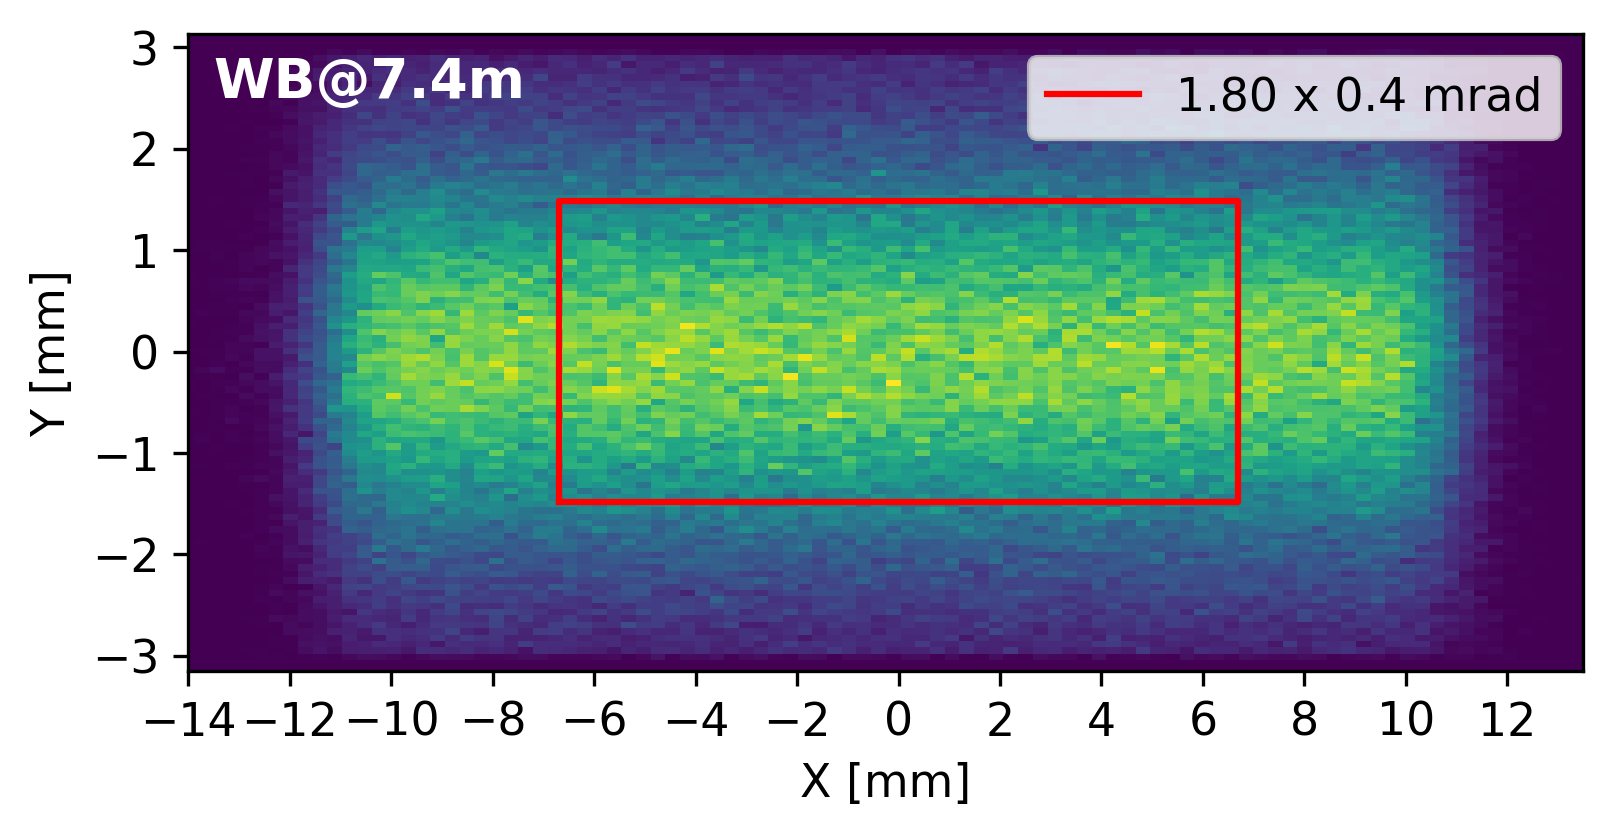

In [25]:
f, ax = plt.subplots()
plt.imshow(WB_FixedMask, extent=[X_WB_FixedMask['X'].min()*0.001,X_WB_FixedMask['X'].max()*0.001,Y_WB_FixedMask['Y'].min()*0.001,Y_WB_FixedMask['Y'].max()*0.001], aspect=2)
plt.plot(np.array([mask[0,0], mask[0,1], mask[0,1], mask[0,0], mask[0,0]]), np.array([mask[1,0], mask[1,0], mask[1,1], mask[1,1], mask[1,0]]), 'r')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
ax.set(xlim=(-13.5, 13.5), ylim=(-3.15, 3.13))
plt.xticks(np.arange(-14, 14, 2))
plt.yticks(np.arange(-3, 4, 1))
plt.legend(["{H:04.2f} x {V} mrad".format(H=mask_divergence[0]*1e3, V=mask_divergence[1]*1e3)], loc='upper right')
ax.annotate('WB@7.4m', xy=(-13.5, 2.5), xytext=(-13.5, 2.5), fontsize='large', weight='bold', c='w')
# f.savefig("WB_snapshot_7.4m.png", bbox_inches='tight', dpi=600)

#### WB @ CVD1

CVD1 size

In [53]:
CVD1a = np.array([20, 6]) # [mm] (Hor. x Ver.)
CVD1 = np.array([[-CVD1a[0]/2, CVD1a[0]/2], [-CVD1a[1]/2, CVD1a[1]/2]])
print(f"CVD1 size: {CVD1a[0]:.2f} x {CVD1a[1]:.2f} [mm^2] (Hor. x Ver.)")

CVD1 size: 20.00 x 6.00 [mm^2] (Hor. x Ver.)


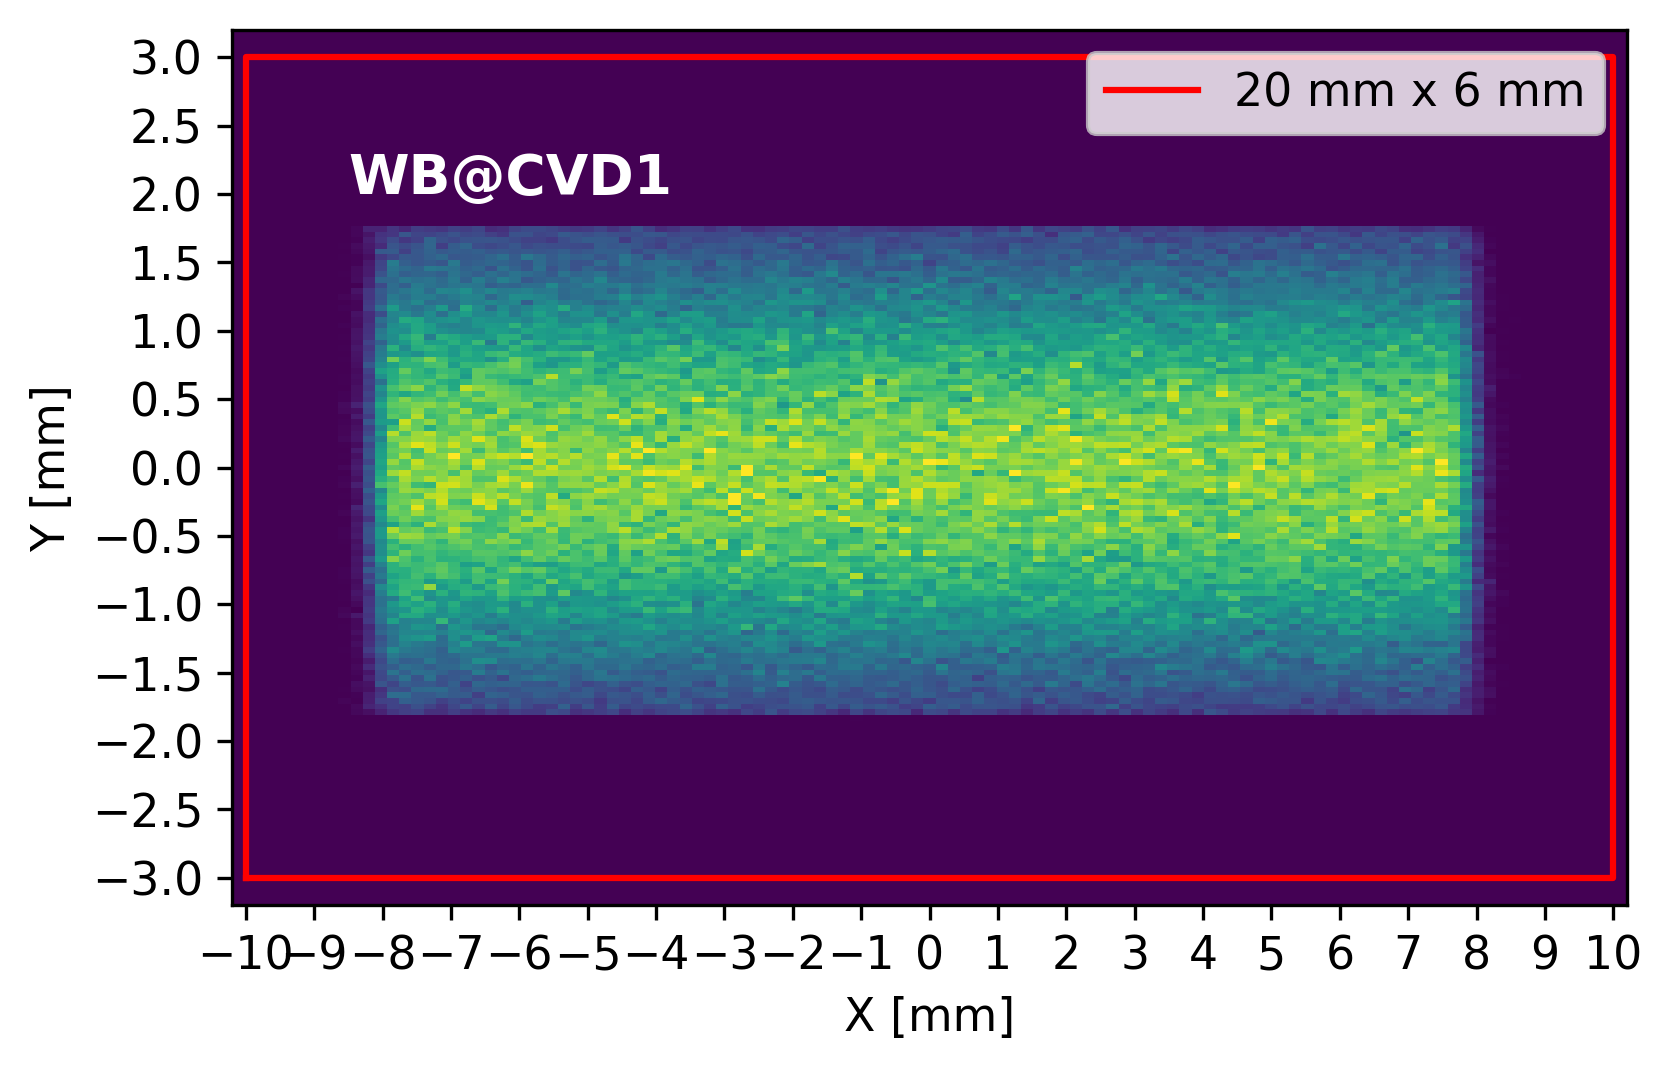

In [72]:
f, ax = plt.subplots()
plt.imshow(WB_DMM_m1, extent=[X_WB_DMM_m1['X'].min()*0.001,X_WB_CVD1['X'].max()*0.001,Y_WB_CVD1['Y'].min()*0.001,Y_WB_CVD1['Y'].max()*0.001], aspect=2)
plt.plot(np.array([CVD1[0,0], CVD1[0,1], CVD1[0,1], CVD1[0,0], CVD1[0,0]]), np.array([CVD1[1,0], CVD1[1,0], CVD1[1,1], CVD1[1,1], CVD1[1,0]]), 'r')
ax.set_facecolor('#440154FF')
plt.clim(0,120)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.xticks(np.arange(-10, 11, 1))
plt.yticks(np.arange(-3, 3.5, 0.5))
ax.set(xlim=(-10.2, 10.2), ylim=(-3.2, 3.2))
ax.annotate('WB@CVD1', xy=(-8.5, 2), xytext=(-8.5, 2), fontsize='large', weight='bold', c='w')
plt.legend(["{H:02.0f} mm x {V} mm".format(H=CVD1a[0], V=CVD1a[1])], loc='upper right')
# f.savefig("WB_snapshot_CVD1.png", bbox_inches='tight', dpi=600)

#### WB @ DMM Mirror 1 (16.165 m)

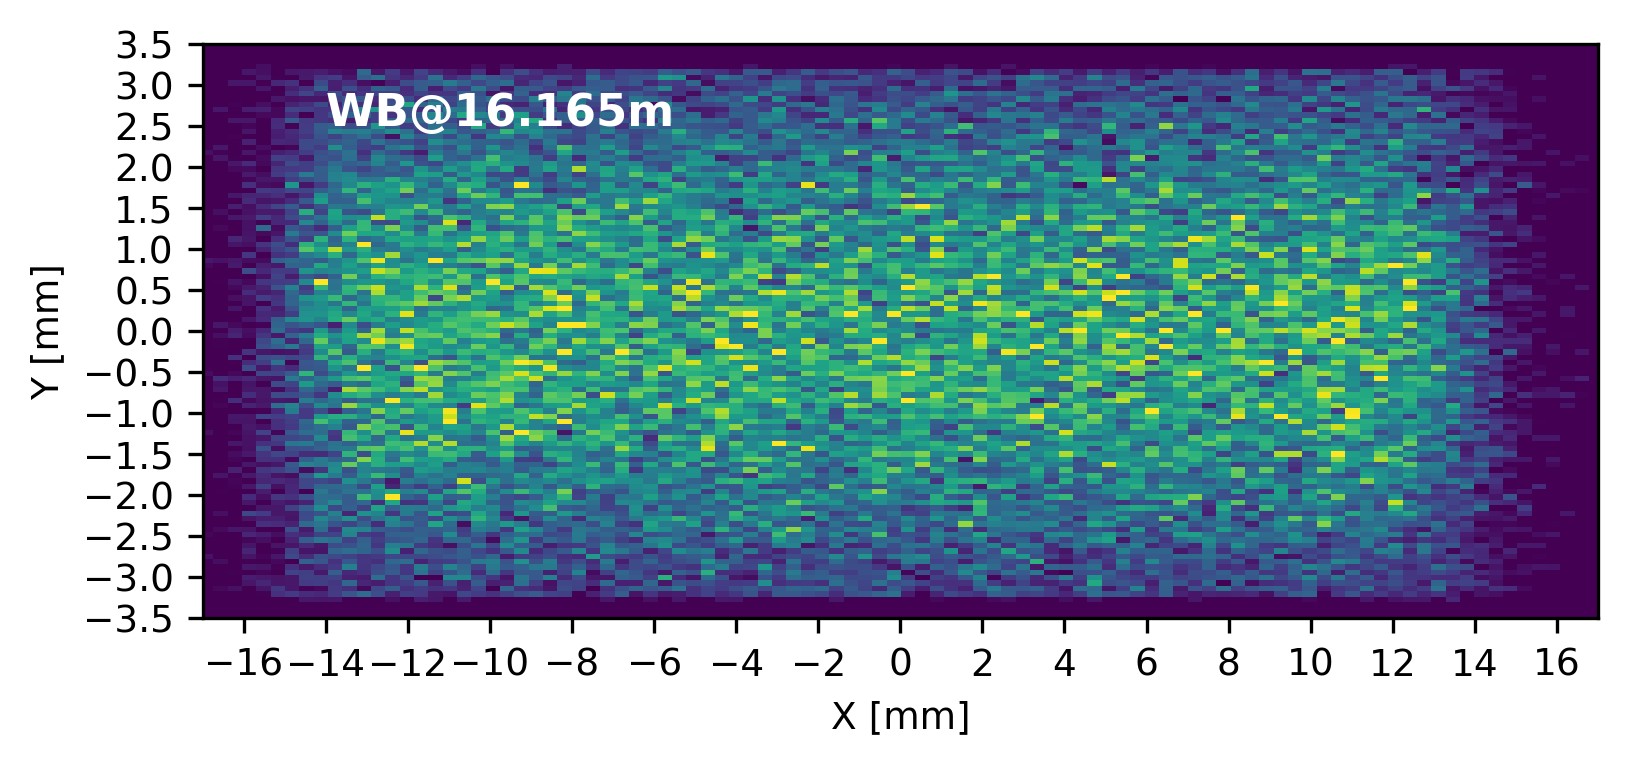

In [23]:
f, ax = plt.subplots()
plt.imshow(WB_DMM_m1, extent=[X_WB_DMM_m1['X'].min()*0.001,X_WB_DMM_m1['X'].max()*0.001,Y_WB_DMM_m1['Y'].min()*0.001,Y_WB_DMM_m1['Y'].max()*0.001], aspect=2)
# plt.plot(np.array([CVD1[0,0], CVD1[0,1], CVD1[0,1], CVD1[0,0], CVD1[0,0]]), np.array([CVD1[1,0], CVD1[1,0], CVD1[1,1], CVD1[1,1], CVD1[1,0]]), 'r')
ax.set_facecolor('#440154FF')
plt.clim(0,15)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.xticks(np.arange(-16, 17, 2))
plt.yticks(np.arange(-4, 4.5, 0.5))
ax.set(xlim=(-17, 17), ylim=(-3.5, 3.5))
ax.annotate('WB@16.165m', xy=(-14, 2.5), xytext=(-14, 2.5), fontsize='large', weight='bold', c='w')
f.savefig("WB_snapshot_16.165.png", bbox_inches='tight', dpi=600)

#### WB @ CVD2

CVD2 size:

In [79]:
CVD2a = np.array([70, 14]) # [mm] (Hor. x Ver.)
CVD2 = np.array([[-CVD2a[0]/2, CVD2a[0]/2], [-CVD2a[1]/2, CVD2a[1]/2]])
print(f"CVD2 size: {CVD2a[0]:.2f} x {CVD2a[1]:.2f} [mm^2] (Hor. x Ver.)")

CVD2 size: 70.00 x 14.00 [mm^2] (Hor. x Ver.)


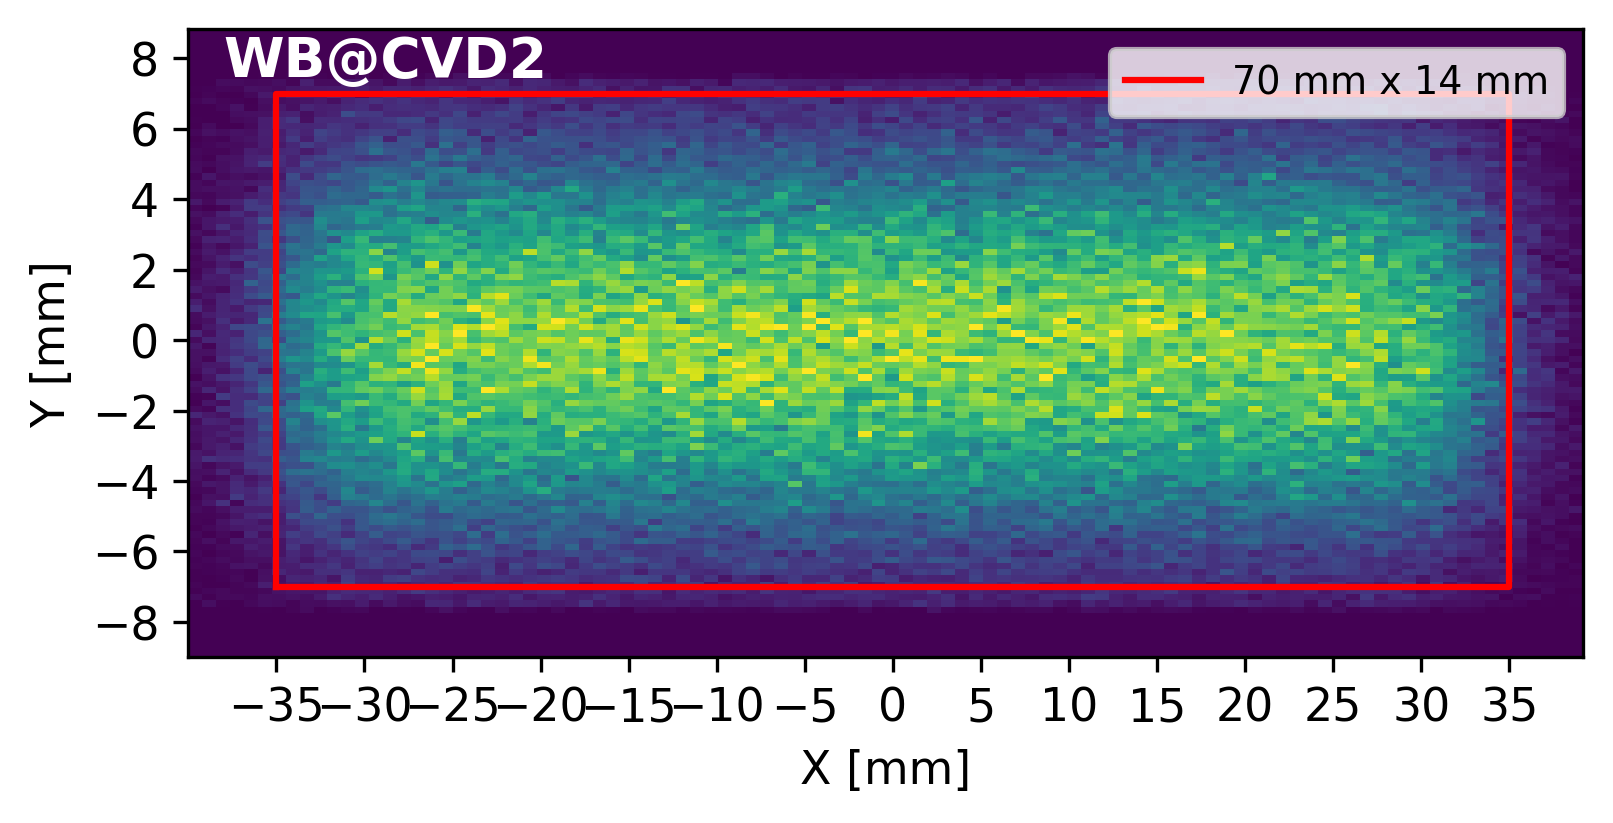

In [93]:
f, ax = plt.subplots()
plt.imshow(WB_CVD2, extent=[X_WB_CVD2['X'].min()*0.001,X_WB_CVD2['X'].max()*0.001,Y_WB_CVD2['Y'].min()*0.001,Y_WB_CVD2['Y'].max()*0.001], aspect=2)
plt.plot(np.array([CVD2[0,0], CVD2[0,1], CVD2[0,1], CVD2[0,0], CVD2[0,0]]), np.array([CVD2[1,0], CVD2[1,0], CVD2[1,1], CVD2[1,1], CVD2[1,0]]), 'r')
ax.set_facecolor('#440154FF')
plt.clim(0,45)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.xticks(np.arange(-35, 40, 5))
plt.yticks(np.arange(-8, 9, 2))
# ax.set(xlim=(-10.2, 10.2), ylim=(-3.2, 3.2))
ax.annotate('WB@CVD2', xy=(-38, 7.5), xytext=(-38, 7.5), fontsize='large', weight='bold', c='w')
plt.legend(["{H:02.0f} mm x {V} mm".format(H=CVD2a[0], V=CVD2a[1])], loc='upper right', fontsize='small')
# f.savefig("WB_snapshot_CVD1.png", bbox_inches='tight', dpi=600)

#### WB @ 42m

Detectors Field Of View (FOV)

In [136]:
# annotate the detector Field Of View
pixels = np.array([2560, 2160]) # PCO.edge 5.5
pixelsize = 0.0065 # [mm]

pixels_WidePIX = np.array([1280, 256]) # AdvaCAM WidePIX
pixelsize_WidePIX = 0.055 # [mm]

FOV_1x = pixels*pixelsize
FOV_2x = pixels*pixelsize/2
FOV_4x = pixels*pixelsize/4
FOV_5x = pixels*pixelsize/5
FOV_10x = pixels*pixelsize/10
FOV_20x = pixels*pixelsize/20

FOV_WidePIX = pixels_WidePIX*pixelsize_WidePIX

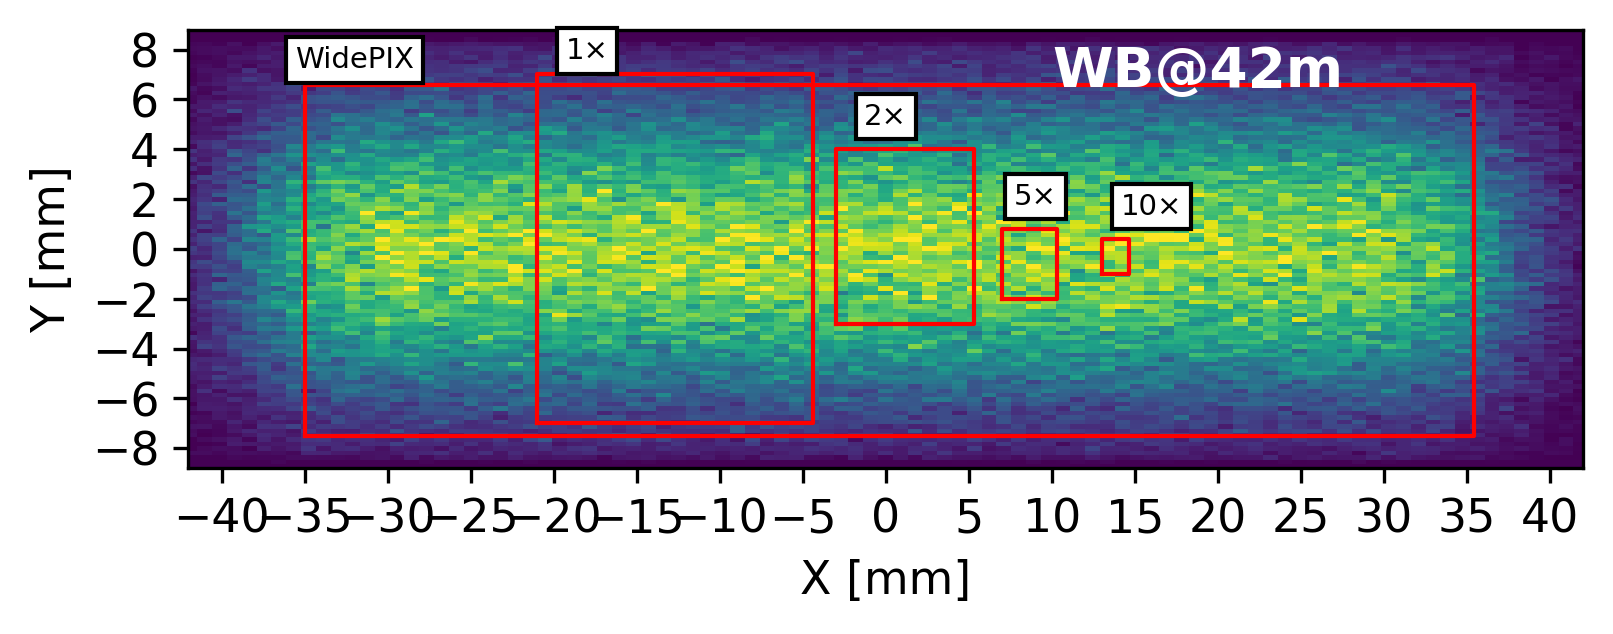

In [145]:
f, ax = plt.subplots()
plt.imshow(WB_42m, extent=[X_WB_42m['X'].min()*0.001,X_WB_42m['X'].max()*0.001,Y_WB_42m['Y'].min()*0.001,Y_WB_42m['Y'].max()*0.001], aspect=1.5)
plt.clim(0,40)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.xticks(np.arange(-40, 45, 5))
plt.yticks(np.arange(-8, 10, 2))
ax.set(xlim=(-42, 42), ylim=(-8.8, 8.8))
ax.annotate('WB@42m', xy=(10, 6.5), xytext=(10, 6.5), fontsize='large', weight='bold', c='w')

# annotate the detector Field Of View
plt.plot(np.array([-21, -21+FOV_1x[0], -21+FOV_1x[0], -21, -21]), np.array([-7, -7, -7+FOV_1x[1], -7+FOV_1x[1], -7]), 'r', linewidth=1)
t = ax.text(-18, -6.1+FOV_1x[1], "1×", ha="center", va="center", size=7, bbox=bbox_props)

plt.plot(np.array([-3, -3+FOV_2x[0], -3+FOV_2x[0], -3, -3]), np.array([-3, -3, -3+FOV_2x[1], -3+FOV_2x[1], -3]), 'r', linewidth=1)
t = ax.text(0, -1.7+FOV_2x[1], "2×", ha="center", va="center", size=7, bbox=bbox_props)

plt.plot(np.array([7, 7+FOV_5x[0], 7+FOV_5x[0], 7, 7]), np.array([-2, -2, -2+FOV_5x[1], -2+FOV_5x[1], -2]), 'r', linewidth=1)
t = ax.text(9, -0.7+FOV_5x[1], "5×", ha="center", va="center", size=7, bbox=bbox_props)

plt.plot(np.array([13, 13+FOV_10x[0], 13+FOV_10x[0], 13, 13]), np.array([-1, -1, -1+FOV_10x[1], -1+FOV_10x[1], -1]), 'r', linewidth=1)
t = ax.text(16, 0.3+FOV_10x[1], "10×", ha="center", va="center", size=7, bbox=bbox_props)

plt.plot(np.array([-35, -35+FOV_WidePIX[0], -35+FOV_WidePIX[0], -35, -35]), np.array([-7.5, -7.5, -7.5+FOV_WidePIX[1], -7.5+FOV_WidePIX[1], -7.5]), 'r', linewidth=1)
t = ax.text(-32, -6.5+FOV_WidePIX[1], "WidePIX", ha="center", va="center", size=7, bbox=bbox_props)

# plt.plot(np.array([16, 16+FOV_20x[0], 16+FOV_20x[0], 16, 16]), np.array([-0.6, -0.6, -0.6+FOV_20x[1], -0.6+FOV_20x[1], -0.6]), 'r', linewidth=3)
# t = ax.text(19.4, -3.5+FOV_10x[1], "20×", ha="center", va="center", size=12, bbox=bbox_props)
# f.savefig("WB_snapshot_43m_2.png", bbox_inches='tight', dpi=600)

#### WB @ 42m with slits closed to 0.5 mm Hor

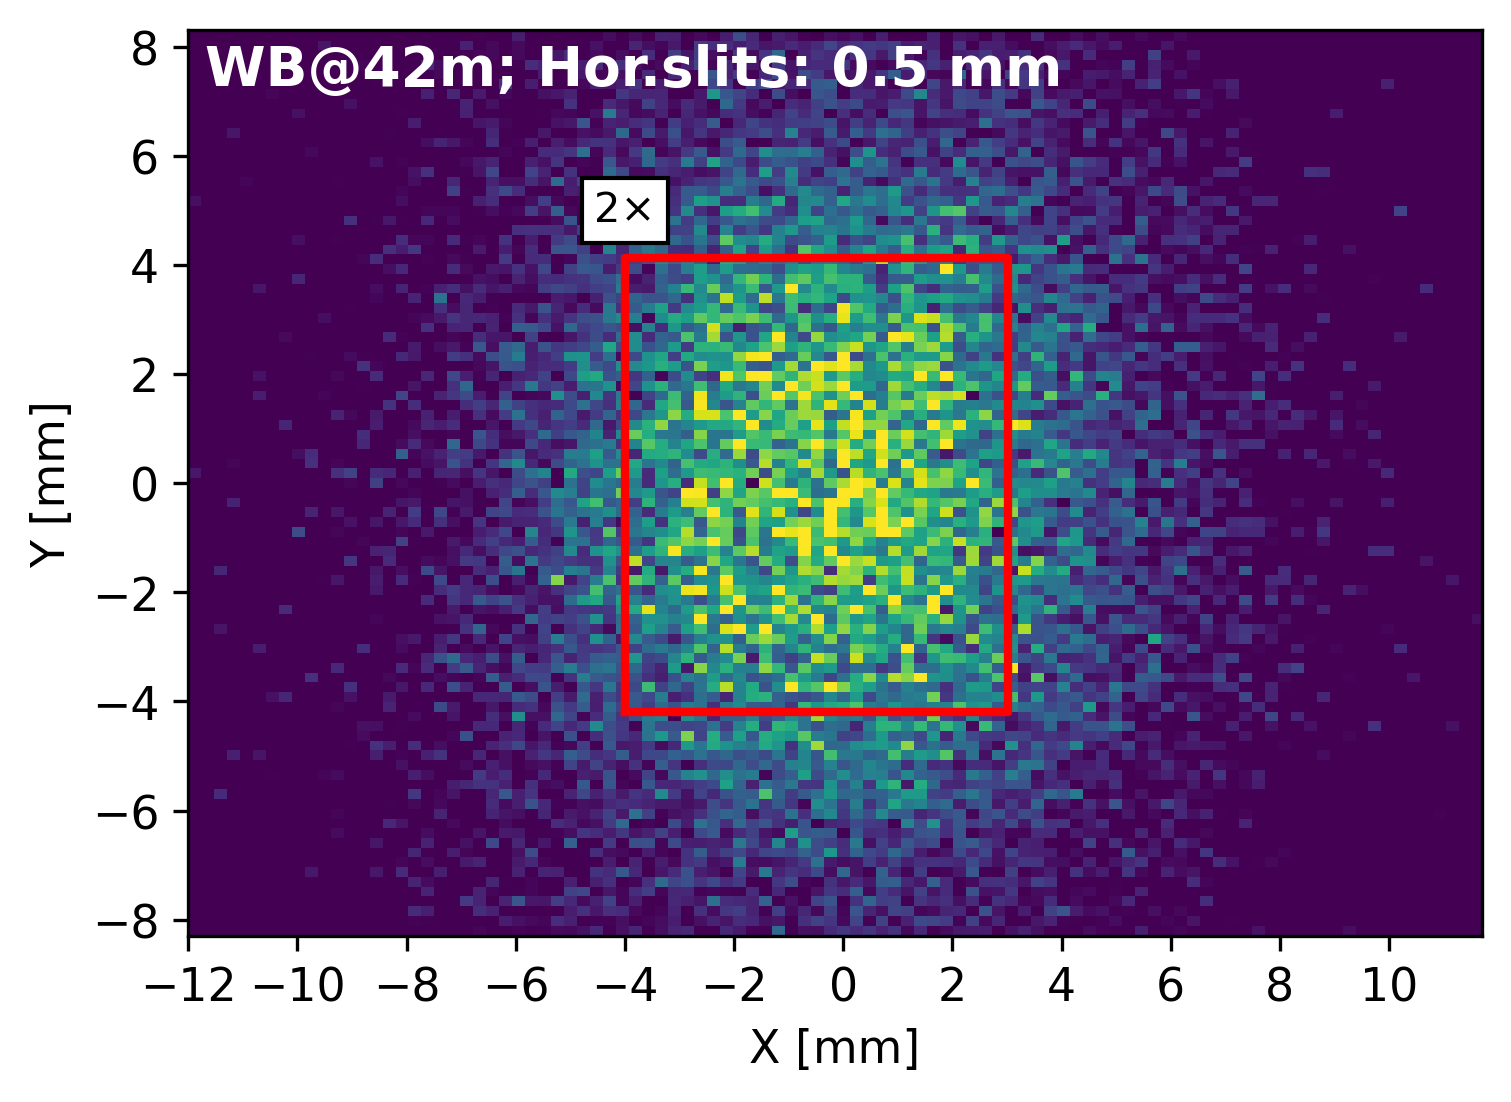

In [204]:
f, ax = plt.subplots()
plt.imshow(WB_42m_slits500um, extent=[X_WB_42m_slits500um['X'].min()*0.001,X_WB_42m_slits500um['X'].max()*0.001,Y_WB_42m_slits500um['Y'].min()*0.001,Y_WB_42m_slits500um['Y'].max()*0.001], aspect=1)
plt.clim(0,6)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.xticks(np.arange(-12, 14, 2))
plt.yticks(np.arange(-8, 9, 2))
ax.set(xlim=(-12, 11.7), ylim=(-8.3, 8.3))
ax.annotate('WB@42m; Hor.slits: 0.5 mm', xy=(-11.7, 7.3), xytext=(-11.7, 7.3), fontsize='large', weight='bold', c='w')

plt.plot(np.array([-4, -4+FOV_2x[1], -4+FOV_2x[1], -4, -4]), np.array([-4.2, -4.2, -4.2+FOV_2x[0], -4.2+FOV_2x[0], -4.2]), 'r', linewidth=2)
t = ax.text(-4, 5, "2×", ha="center", va="center", size=10, bbox=bbox_props)
# f.savefig("WB_snapshot_43m_slits500um.png", bbox_inches='tight', dpi=600)

## DMM beam snapshots

Read beam profiles from Shadow

In [162]:
source_plots_dir = './beam_profiles/'

WB4C_35keV = np.load(source_plots_dir + 'BEATS_WB4C100_OE360x25_35keV_42m.npy')
X_WB4C_35keV = pd.read_csv(source_plots_dir + 'BEATS_WB4C100_OE360x25_35keV_42m_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_WB4C_35keV = pd.read_csv(source_plots_dir + 'BEATS_WB4C100_OE360x25_35keV_42m_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

RuB4C_20keV = np.load(source_plots_dir + 'BEATS_RuB4C65_OE360x25_20keV_42m.npy')
X_RuB4C_20keV = pd.read_csv(source_plots_dir + 'BEATS_RuB4C65_OE360x25_20keV_42m_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_RuB4C_20keV = pd.read_csv(source_plots_dir + 'BEATS_RuB4C65_OE360x25_20keV_42m_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

Stripe 1: [Ru/B4C]65 - d: 4.0 nm

Text(-32, 4, '$[Ru/B_{4}C]_{65}; 20 keV; @42m$')

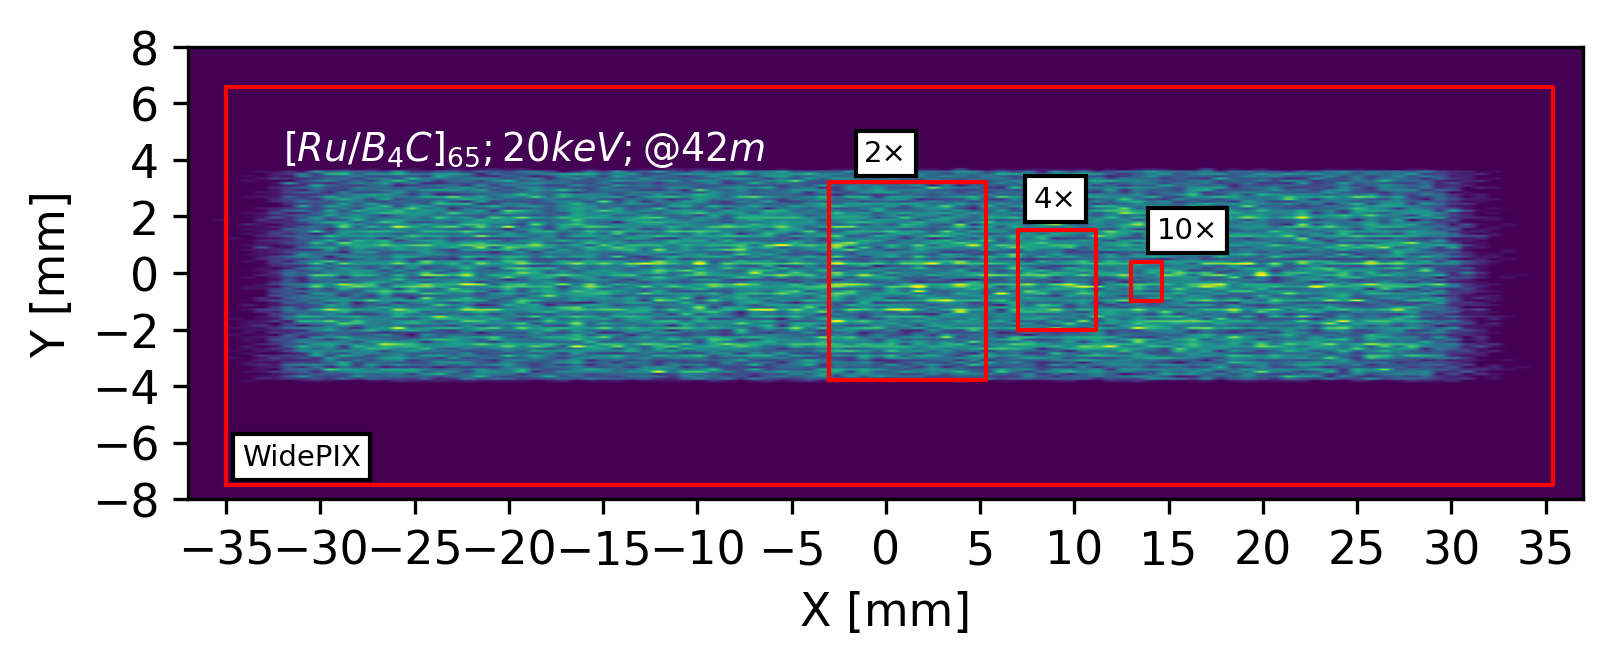

In [194]:
f, ax = plt.subplots()
plt.imshow(RuB4C_20keV, extent=[X_RuB4C_20keV['X'].min()*0.001,X_RuB4C_20keV['X'].max()*0.001,Y_RuB4C_20keV['Y'].min()*0.001,Y_RuB4C_20keV['Y'].max()*0.001], aspect=1.5)
plt.clim(0,12)
ax.set_facecolor('#440154FF')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')

# annotate the detector Field Of View
plt.plot(np.array([-3, -3+FOV_2x[0], -3+FOV_2x[0], -3, -3]), np.array([-3.8, -3.8, -3.8+FOV_2x[1], -3.8+FOV_2x[1], -3.8]), 'r', linewidth=1)
t = ax.text(0, -2.8+FOV_2x[1], "2×", ha="center", va="center", size=7, bbox=bbox_props)

plt.plot(np.array([7, 7+FOV_4x[0], 7+FOV_4x[0], 7, 7]), np.array([-2, -2, -2+FOV_4x[1], -2+FOV_4x[1], -2]), 'r', linewidth=1)
t = ax.text(9, -0.9+FOV_4x[1], "4×", ha="center", va="center", size=7, bbox=bbox_props)

plt.plot(np.array([13, 13+FOV_10x[0], 13+FOV_10x[0], 13, 13]), np.array([-1, -1, -1+FOV_10x[1], -1+FOV_10x[1], -1]), 'r', linewidth=1)
t = ax.text(16, 0.1+FOV_10x[1], "10×", ha="center", va="center", size=7, bbox=bbox_props)

plt.plot(np.array([-35, -35+FOV_WidePIX[0], -35+FOV_WidePIX[0], -35, -35]), np.array([-7.5, -7.5, -7.5+FOV_WidePIX[1], -7.5+FOV_WidePIX[1], -7.5]), 'r', linewidth=1)
t = ax.text(-31, -6.5, "WidePIX", ha="center", va="center", size=7, bbox=bbox_props)


plt.xticks(np.arange(-35, 40, 5));
plt.yticks(np.arange(-4, 5, 1));
plt.yticks(np.arange(-8, 10, 2));
ax.set(xlim=(-37, 37), ylim=(-8, 8))
ax.annotate('$[Ru/B_{4}C]_{65}; 20 keV; @42m$', xy=(-32, 4), xytext=(-32, 4), fontsize='small', weight='bold', c='w')

Stripe 2: [W/B4C]100 - d: 3.0 nm

Text(-32, 3.1, '$[W/B_{4}C]_{100}; 35 keV; @42m$')

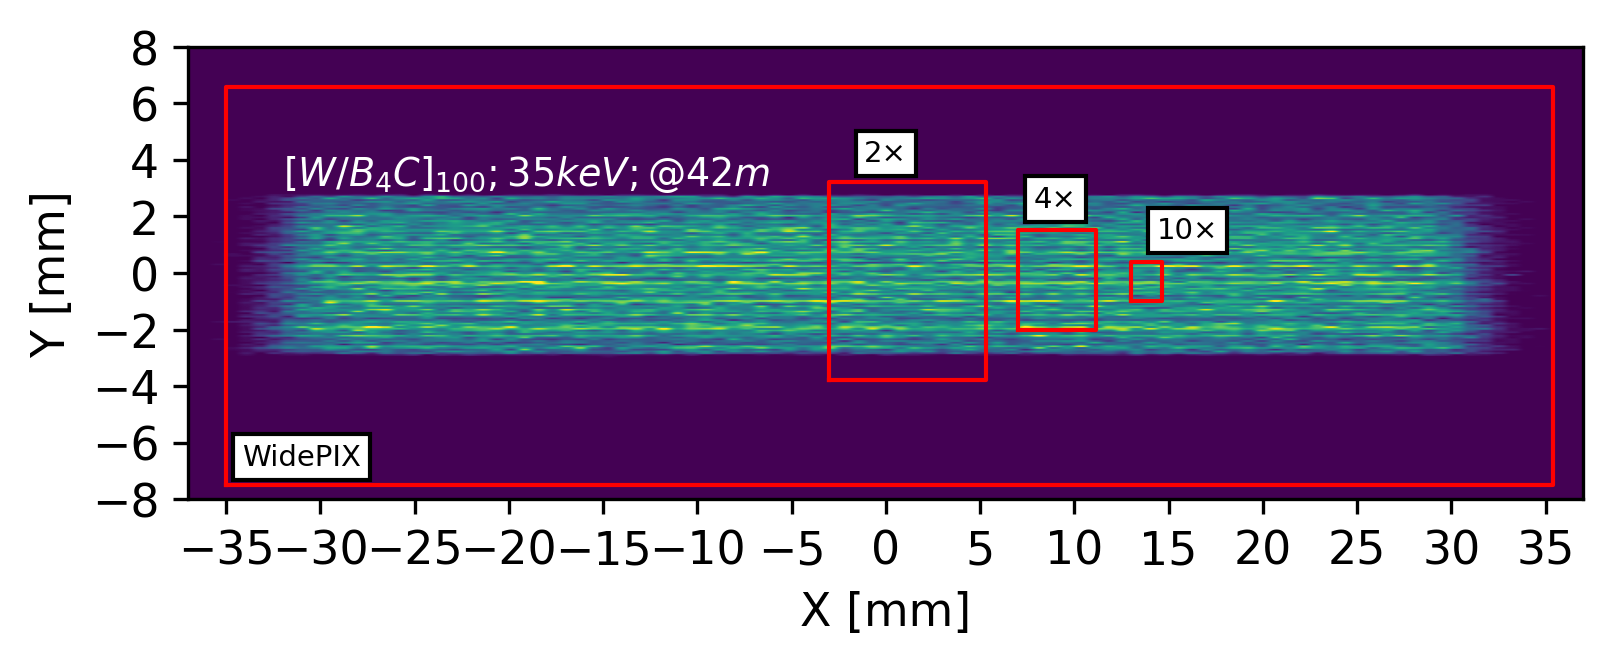

In [198]:
f, ax = plt.subplots()
plt.imshow(WB4C_35keV, extent=[X_WB4C_35keV['X'].min()*0.001,X_WB4C_35keV['X'].max()*0.001,Y_WB4C_35keV['Y'].min()*0.001,Y_WB4C_35keV['Y'].max()*0.001], aspect=1.5)
plt.clim(0,20)
ax.set_facecolor('#440154FF')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')

# annotate the detector Field Of View
plt.plot(np.array([-3, -3+FOV_2x[0], -3+FOV_2x[0], -3, -3]), np.array([-3.8, -3.8, -3.8+FOV_2x[1], -3.8+FOV_2x[1], -3.8]), 'r', linewidth=1)
t = ax.text(0, -2.8+FOV_2x[1], "2×", ha="center", va="center", size=7, bbox=bbox_props)

plt.plot(np.array([7, 7+FOV_4x[0], 7+FOV_4x[0], 7, 7]), np.array([-2, -2, -2+FOV_4x[1], -2+FOV_4x[1], -2]), 'r', linewidth=1)
t = ax.text(9, -0.9+FOV_4x[1], "4×", ha="center", va="center", size=7, bbox=bbox_props)

plt.plot(np.array([13, 13+FOV_10x[0], 13+FOV_10x[0], 13, 13]), np.array([-1, -1, -1+FOV_10x[1], -1+FOV_10x[1], -1]), 'r', linewidth=1)
t = ax.text(16, 0.1+FOV_10x[1], "10×", ha="center", va="center", size=7, bbox=bbox_props)

plt.plot(np.array([-35, -35+FOV_WidePIX[0], -35+FOV_WidePIX[0], -35, -35]), np.array([-7.5, -7.5, -7.5+FOV_WidePIX[1], -7.5+FOV_WidePIX[1], -7.5]), 'r', linewidth=1)
t = ax.text(-31, -6.5, "WidePIX", ha="center", va="center", size=7, bbox=bbox_props)

plt.xticks(np.arange(-35, 40, 5));
plt.yticks(np.arange(-4, 5, 1));
plt.yticks(np.arange(-8, 10, 2));
ax.set(xlim=(-37, 37), ylim=(-8, 8))
ax.annotate('$[W/B_{4}C]_{100}; 35 keV; @42m$', xy=(-32, 3.1), xytext=(-32, 3.1), fontsize='small', weight='bold', c='w')